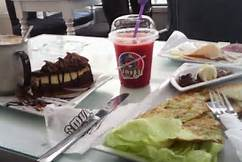

In [5]:
from IPython.display import Image
Image(filename='th.jpg')




After gathering the data with facebook Scraper it's time to analyse it and try to learn from it the Tunisian dialect using machine learning tools.
First we had exported needed libraries such as scikit-learn, numpy for data processing and xlrd ,csv for excel microsoft sheet processing.

In [6]:
## Import entire libraries

import numpy as np

## Import specific items only from the sklearn library

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

In [7]:
import csv 
import xlrd
import math 
import numpy as np
import sklearn.cluster
import distance
from sklearn import preprocessing

First of all we load the data in our system,we open the execl shhet files using opne_workbook of the xlrd library, then we place ourselves in the first "feuille" as it's where our data is located,we create an empty list and retrive the comments located in the first column.

In [8]:
wb = xlrd.open_workbook('bad_ones.xlsx')
wg = xlrd.open_workbook('good_ones.xlsx')


In [9]:
sb = wb.sheet_by_name(u'Feuil1') #bad_ones in feuil 1 
sg = wg.sheet_by_name(u'Feuil1') #good_ones in feuil 1


In [10]:
bad_com = []
good_com = []
bad_com = sb.col_values(0) #getting data in the first column 
good_com = sg.col_values(0) #same here 

the following cells are just used to gater information abut the data such as numbers and so on.

In [11]:
#need to pt togeather the pos and neg comments
all_com = good_com + bad_com
print(len(all_com)) #all comments 

546


In [13]:
#to diffrenciate btw bad and good coms 
y = [1]*len(good_com) + [0]*len(bad_com)
X = all_com

In [21]:
print(y)
print(X)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Here we are going to split our data one for train and others for tests as it's the technique used in supervised machine learning.

In [22]:
#splitting data , supervised learning so we need the labeling at the end which is "y" 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2017)
print(X_train)

['saha tae Ennasr?', 'Ken ikamllou isall7ou el beb elli 3omrou ma yetsakker twalli tayara', 'Behi amoura walah tawa nkalmek menghir manzid nchahik fama barcha fazet bnen 3al le5er', 'emela tawa na3mel 1er mi temps fi ariana w nkammel fel nasser :p :p', "smug's ennasr c où exactement svp", 'Je confirme bénnna 3la bénnna!! 😊', 'Maa Mar nmchiw 😍😍😍😍', 'Sana Bahloul na3mlouh marra ;)', "OMPV a smug's la marsa un délicieux petit dej...je vous le conseil 3al leeeekher 😎😎😎", 'Quite pricey. Nothing special here much like most other places in this area.', 'Ah ouii.<3', 'Miam miam daher bnin 😍', 'Mnin tebda tekelha hedhi hhhhhhh', '17 tnd yaser 3lih', "Petit déjeuner Zone lac 1 bi 5laf smug's w la Croisette", "Smug's", 'Manel Tmar Akremi Imen Boughazli nemchiw amaaan', 'W ena winn 😔😔', "mahich bnina 7atta tarif zeda , feha 3 couches de pain gras super gras mbasses barchaa bsal doré chweya viande haché w felfel 7ar mais 7aaaaaaaaaar ,le fromage qui déborde est mis juste sur les bords w mahouch bni

In [19]:
#Convert the text document to a matrix of token counts numbers 0 and 1 
count_vect = CountVectorizer()

# the fit() method tokenizes documents and extracts their vocabulary, i.e. set of distinct words
a = count_vect.fit(X_train)

In [20]:
print(a)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [23]:
# calculate the document-term matrix for the training corpus
X_train_vectorized = count_vect.transform(X_train)
print(type(X_train_vectorized))
print(X_train_vectorized)


<class 'scipy.sparse.csr.csr_matrix'>
  (0, 543)	1
  (0, 1417)	1
  (0, 1532)	1
  (1, 49)	1
  (1, 229)	1
  (1, 523)	1
  (1, 528)	1
  (1, 765)	1
  (1, 793)	1
  (1, 848)	1
  (1, 949)	1
  (1, 1549)	1
  (1, 1647)	1
  (1, 1751)	1
  (2, 22)	1
  (2, 155)	1
  (2, 217)	1
  (2, 235)	1
  (2, 284)	1
  (2, 577)	1
  (2, 586)	1
  (2, 905)	1
  (2, 1002)	1
  (2, 1054)	1
  (2, 1150)	1
  :	:
  (429, 1663)	1
  (430, 292)	1
  (431, 340)	1
  (431, 483)	1
  (431, 534)	1
  (431, 890)	1
  (431, 978)	1
  (431, 1228)	1
  (431, 1333)	1
  (431, 1417)	1
  (431, 1641)	1
  (431, 1649)	1
  (431, 1661)	1
  (432, 1478)	1
  (433, 421)	1
  (433, 523)	1
  (433, 657)	1
  (433, 792)	1
  (433, 1203)	1
  (434, 865)	1
  (434, 1757)	1
  (435, 131)	1
  (435, 202)	1
  (435, 866)	1
  (435, 971)	1


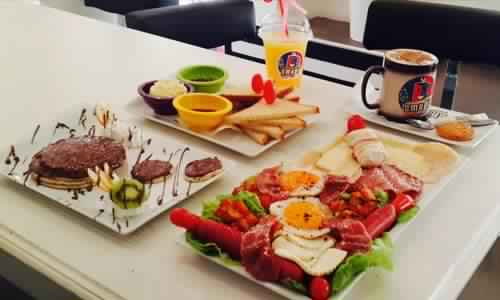

In [55]:
from IPython.display import Image
Image(filename='smug.jpg')

Before diving into the prediction part we first normalize the data 

In [24]:
X_normalized = preprocessing.normalize(X_train_vectorized, norm='l2')
normalizer = preprocessing.Normalizer().fit(X_normalized)

In [25]:
# determine number of non-zero elements in document-term matrix of training corpus
print(X_train_vectorized.nnz)

3862


 Calculate document frequency of each vocabulary word

In [26]:

doc_freq = np.array((X_train_vectorized > 0).sum(0)).ravel()


In [27]:
# Calculate relative document frequency of each vocabulary word
n,m = X_train_vectorized.shape
rel_doc_freq = np.array((X_train_vectorized > 0).sum(0)/n).ravel()

print(rel_doc_freq.shape)
print([np.amin(rel_doc_freq), np.median(rel_doc_freq), np.mean(rel_doc_freq), np.amax(rel_doc_freq)])

(1809,)
[0.0022935779816513763, 0.0022935779816513763, 0.0048965163986388147, 0.19724770642201836]


In [39]:
#this is a comprehension structure 
vocab = count_vect.get_feature_names()
[x for index,x in enumerate(vocab) if doc_freq[index]>3]   

['10',
 '1h',
 '22dt',
 '30',
 '3al',
 '3alle5er',
 '3andhom',
 '45',
 '7aja',
 '7ajet',
 '7it',
 'accueil',
 'ai',
 'air',
 'alors',
 'aman',
 'après',
 'attente',
 'au',
 'aucun',
 'aussi',
 'avec',
 'avez',
 'avoir',
 'awel',
 'ba3d',
 'bacon',
 'barcha',
 'barchaa',
 'bech',
 'bechfé',
 'benna',
 'bien',
 'big',
 'bizarre',
 'bnin',
 'bnina',
 'bon',
 'bonne',
 'bouffe',
 'brabi',
 'brunch',
 'burger',
 'café',
 'cake',
 'chaleureux',
 'chay',
 'cheesecake',
 'chez',
 'commande',
 'confirme',
 'contre',
 'crépe',
 'de',
 'dej',
 'des',
 'deux',
 'dommage',
 'donc',
 'dt',
 'du',
 'déj',
 'déjeuner',
 'délicieux',
 'déçu',
 'el',
 'eli',
 'en',
 'ena',
 'ennasr',
 'enti',
 'est',
 'et',
 'exactement',
 'fama',
 'fameux',
 'farm',
 'feha',
 'fel',
 'fi',
 'fil',
 'fois',
 'fromage',
 'good',
 'gout',
 'hedha',
 'hedhi',
 'hetha',
 'hhhh',
 'il',
 'imen',
 'is',
 'je',
 'jus',
 'ken',
 'khyr',
 'ki',
 'kol',
 'koll',
 'la',
 'lac',
 'le',
 'lent',
 'les',
 'loool',
 'lyoum',
 'ma',
 '

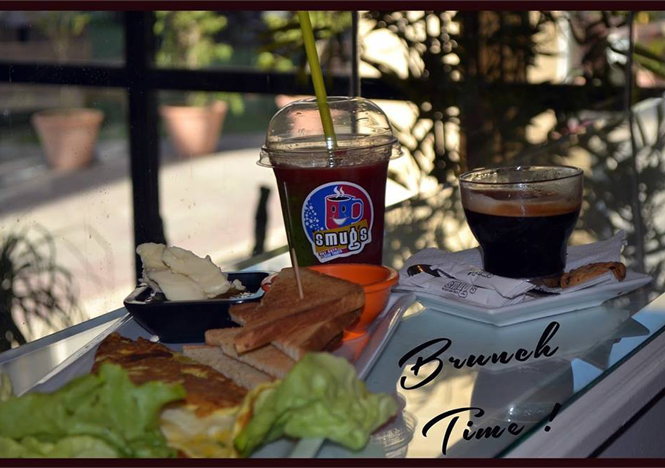

In [56]:
from IPython.display import Image
Image(filename='smugs.jpg')

In [28]:
 
words_per_doc = np.array(X_train_vectorized.sum(1))
print(words_per_doc.shape)
print([np.amin(words_per_doc), np.median(words_per_doc), np.mean(words_per_doc), np.amax(words_per_doc)])

(436, 1)
[0, 5.0, 9.4128440366972477, 89]


In [29]:
# Calculate number of UNIQUE words in each training document
unique_words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(unique_words_per_doc.shape)
print([np.amin(unique_words_per_doc), np.median(unique_words_per_doc), np.mean(unique_words_per_doc), np.amax(unique_words_per_doc)])

(436, 1)
[0, 5.0, 8.8577981651376145, 76]


In [30]:
# Which documents have length 0
idx = np.where(words_per_doc == 0)[0]
[X_train[i] for i in idx]

['????????????', '', '', '', '????????????', '', '\xa0-1', '']

In [31]:
## Select training documents that have length 0
idx2 = np.where(words_per_doc > 0)[0]
X_train2 = [X_train[i] for i in idx2]
y_train2 = [y_train[i] for i in idx2]
print([len(X_train), len(X_train2)])
print([len(y_train), len(y_train2)])

[436, 428]
[436, 428]


In [32]:
# overwrite the training corpus
X_train = X_train2
y_train = y_train2


In [33]:
# re-compute the document-term matrix
X_train_vectorized = count_vect.transform(X_train)
X_train_vectorized.shape

(428, 1809)

In [34]:
# verify results: re-compute number of words in each document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(428, 1)
1
76


In [35]:
# Train the model using LR method
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# first obtain the document-term matrix of the test corpus
X_test_vectorized = count_vect.transform(X_test)
print(type(X_test_vectorized))
print(X_test_vectorized.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(110, 1809)


In [37]:
# Use this model to predict the sentiment category of test documents
LR_predictions = LR_model.predict(X_test_vectorized)
print(type(LR_predictions))
print(LR_predictions.shape)

<class 'numpy.ndarray'>
(110,)


In [38]:
print(LR_predictions[:30])
print(np.array(y_test[:30]))

[1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0]
[0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1]


In [39]:
# Calculate classification rate on the test corpus

LR_classif_rate = accuracy_score(y_test, LR_predictions)
LR_classif_rate

0.78181818181818186

In [40]:
#with naive bayes 
NB_model = MultinomialNB()
NB_model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
## Use this model to predict sentiment of test documents

NB_predictions = NB_model.predict(X_test_vectorized)

In [42]:
## Calculate model's classification rate on the test corpus

NB_classif_rate = accuracy_score(y_test, NB_predictions)
NB_classif_rate

0.74545454545454548

In [43]:
#other techniques 
## Build vocabulary using training corpus
count_vect2 = CountVectorizer(min_df = 5)
count_vect2.fit(X_train)
len(count_vect2.vocabulary_)

137

In [44]:
## Calculate the document-term matrix of the training corpus
X_train_vectorized_2 = count_vect2.transform(X_train)
print(type(X_train_vectorized_2))
print(X_train_vectorized_2.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(428, 137)


In [45]:
## Build the classification model (classifier)

LR_model_2 = LogisticRegression()
LR_model_2.fit(X_train_vectorized_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
## Calculate the classification rate of this model

X_test_vectorized_2 = count_vect2.transform(X_test)
LR_predictions_2 = LR_model_2.predict(X_test_vectorized_2)
accuracy_score(y_test, LR_predictions_2)

0.76363636363636367

In [47]:
## Build vocabulary using training corpus

tf_vect = TfidfVectorizer(use_idf=False)
tf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=False,
        vocabulary=None)

In [48]:
## Build document-term matrix of training corpus

X_train_vectorized_3 = tf_vect.transform(X_train)

In [49]:
## Build the classification model (classifier)

LR_model_3 = LogisticRegression()
LR_model_3.fit(X_train_vectorized_3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
## Calculate the classification rate of this model

X_test_vectorized_3 = tf_vect.transform(X_test)
LR_predictions_3 = LR_model_3.predict(X_test_vectorized_3)
accuracy_score(y_test, LR_predictions_3)

0.77272727272727271

In [51]:
## Build vocabulary using training corpus

tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [52]:
## Build document-term matrix of training corpus

X_train_vectorized_4 = tfidf_vect.transform(X_train)

In [53]:
## Build the classification model (classifier)

LR_model_4 = LogisticRegression()
LR_model_4.fit(X_train_vectorized_4, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
## Calculate the classification rate of this model

X_test_vectorized_4 = tfidf_vect.transform(X_test)
LR_predictions_4 = LR_model_4.predict(X_test_vectorized_4)
accuracy_score(y_test, LR_predictions_4)

0.75454545454545452

In the end we want to say that all the methods used have an accuracy propotion of 70 percent. This good propotion is due to a good cleaning,normalisation and preprocessing of the data. 